# Indirect simple shooting

We present in this notebook the **indirect simple shooting** method based on the [Pontryagin Maximum Principle (PMP)](https://en.wikipedia.org/wiki/Pontryagin%27s_maximum_principle) to solve a smooth optimal control problem. By smooth, we mean that the maximization condition of the PMP gives a control law in feedback form (i.e. with respect to the state and the costate) at least [continuously differentiable](https://en.wikipedia.org/wiki/Smoothness#Differentiability_classes).

## Statement of the optimal control problem

To illustrate the simple shooting method, we consider the following optimal control problem (Lagrange cost, fixed final time):

$$ 
\begin{equation}
    \left\{ 
    \begin{array}{l}
        \displaystyle J(u)  := \displaystyle \frac{1}{2} \int_0^{t_f} u(t)^2 \, \mathrm{d}t \longrightarrow \min \\[1.0em]
        \dot{x}(t) =  \displaystyle -x(t)+u(t), \quad  u(t) \in \mathrm{R}, \quad t \in [0, t_f] \text{ a.e.}, \\[1.0em]
        x(0) = x_0 , \quad x(t_f) = x_f,
    \end{array}
    \right. 
    \tag{OCP}
    \label{eq:OCP}
\end{equation}
$$

with $t_f := 1$, $x_0 := -1$, $x_f := 0$ and $\forall\, t \in[0, t_f]$, $x(t) \in \mathrm{R}$.
Let us denote by

$$
    H(x,p,p^0,u) := p \, (-x+u) + p^0\, \frac{1}{2} u^2,
$$

the *pseudo-Hamiltonian* (that is the non-maximized Hamiltonian) associated to the optimal control problem.

## Application of the Pontryagin Maximum Principle

According to the PMP, if $u$ is solution of $\eqref{eq:OCP}$ (with $x$ the associated trajectory), then there exists a *covector* $p$ (which is [absolutely continuous](https://en.wikipedia.org/wiki/Absolute_continuity)), a scalar $p^0 \le 0$, such that $(p, p^0) \ne (0,0)$ and such that the three following conditions are satisfied almost everywhere on $[0, t_f]$: 

$$
    \begin{equation}
        \left\{ 
            \begin{aligned}
                \dot{x}(t)  & = \phantom{-} \frac{\partial H}{\partial p}[t] = -x(t)+u(t),   \\[0.5em]
                \dot{p}(t)  & = -           \frac{\partial H}{\partial x}[t] = p(t),         \\[0.5em]
                0           & = \phantom{-} \frac{\partial H}{\partial u}[t] = p(t)+p^0 u(t),
            \end{aligned}
        \right.
        \tag{1}
        \label{eq:PMP}
    \end{equation}
$$

where $[t] := (x(t),p(t),p^0,u(t))$. If $p^0 = 0$, then $p = 0$ by the third equation and so $(p, p^0) = (0,0)$ which is not. Hence, any *extremal* $(x, p, p^0, u)$ given by the PMP is *normal*, that is $p^0 < 0$ (an extremal is said *abnormal* when $p^0=0$). 

> **_Remark:_** The maximization condition of the PMP:
>
>$$
H[t] = \max_{w \in \mathrm{R}} H(x(t), p(t), p^0, w)
$$
>
> is equivalent here to the condition $\partial_u H[t] = 0$ by concavity.

Solving the third equation of $\eqref{eq:PMP}$, the control satisfies $u(t) = u_s(x(t), p(t), p^0) := -p(t)/p^0$ where we have introduced the smooth function on $\mathrm{R} \times \mathrm{R} \times \mathrm{R}^*_-$:

$$
u_s(x,p,p^0) = -p/p^0.
$$

> **_Remark:_** This function $u_s$ is the control law in feedback form mentionned in the introduction, and since it is smooth, we can apply a simple shooting method that we describe hereinafter.

We can arbitrary fix $p^0$ by *homogeneity* since for any $\alpha \in \mathrm{R}^*_+$, we have $u_s(x, \alpha p, \alpha p^0) = u_s(x, p, p^0)$ and so the three equations of $\eqref{eq:PMP}$ are unchanged replacing $(p, p^0)$ by $(\alpha p, \alpha p^0)$. Let us fix $p^0=-1$ and let us rewrite the control law

$$
u_s(x, p) = p.
$$


## Boundary value problem

The application of the PMP in the smooth case leads us to define the following smooth *Two-Points Boundary Value Problem* (TPBVP or BVP for short):

$$
    \begin{equation}
        \left\{ 
            \begin{aligned}
                \dot{x}(t)  & = -x(t)+u_s(x(t),p(t)) = -x(t) + p(t),   \\[0.5em]
                \dot{p}(t)  & = p(t),         \\[0.5em]
                x(0) &= 0, \quad x(t_f) = x_f.
            \end{aligned}
        \right. 
        \tag{BVP}
        \label{eq:BVP}
    \end{equation}
$$

The unknown of this BVP is the initial covector $p(0)$. Indeed, fixing $p_0:=p(0)$, then according to the [Cauchy-Lipschitz theorem](https://en.wikipedia.org/wiki/Picard–Lindelöf_theorem), there exists a unique maximal solution denoted 

$$
z(\cdot, x_0, p_0) := (x(\cdot, x_0, p_0),p(\cdot, x_0, p_0))
$$

satisfying the dynamics $\dot{z}(t) = (-x(t)+p(t), p(t))$ together with the initial condition $z(0) = (x_0, p_0)$. The goal is thus to find the right initial covector $p_0$ such that $x(t_f, x_0, p_0) = x_f$.

> **_Remark:_** Note that thanks to the PMP, we have replaced the research of u (which is a function of time) by the research of an element of $\mathrm{R}$: the covector $p_0$. The prize of such a drastic reduction is to work in the *cotangent space*, that is the trajectory $x$ is lifted in a bigger space and adjoined with a covector $p$: this makes the simple shooting method to be qualified of *indirect*. It is important to note that in the indirect methods we work with $z=(x,p)$ and not only with the trajectory $x$.

To emphazise the fact that we work with $(x,p)$ and not only $x$, we introduce the *Hamiltonian system*:

$$
\begin{equation}
    \vec{H}(x,p) := \left( \frac{\partial H}{\partial p}(x,p,u_s(x,p)), -\frac{\partial H}{\partial x}(x,p,u_s(x,p)) \right),
\end{equation}
$$

in such a way that the solution $z(\cdot, x_0, p_0)$ is given by the *exponential mapping*:

$$
    z(t, x_0, p_0) = \exp(t \vec{H})(x_0, p_0).
$$

> **_Remark:_** The notation with the exponential mapping is introduced because it is more explicit and permits to show that we need to define the Hamiltonian system and we need to compute the exponential, in order to compute an extremal solution of the PMP.

> **_Remark:_** Let us define the true Hamiltonian $h(x,p) := H(x, p, u_s(x,p))$ and introduce the associated Hamiltonian system $\vec{h}(x,p) = (\partial_p h(x,p), -\partial_x h(x,p))$. We have said that $\vec{H}$ is a Hamiltonian system because actually we have the following remarkable fact:
>
> $$
    \vec{H}(x,p) = \vec{h}(x,p),
$$
> since $\partial_u H(x, p, u_s(x, p)) = 0$.

## Shooting function and indirect shooting method

[comment]: <> (mettre la figure explicative avec les algos dont on a besoin. Parler de dérivées plus tard ou dans un autre notebook.)

To solve $\eqref{eq:BVP}$, we define a set of nonlinear equations which will be called the *shooting equations*. To do so, we introduce the *shooting function* $S \colon \mathrm{R} \to \mathrm{R}$:

$$
 S(p_0) := \Pi_x \left( \exp(t_f \vec{H})(x_0, p_0) \right) - x_f,
$$

where $\Pi_x(x,p) := x$ is the canonical projection into the state space. Solving $\eqref{eq:BVP}$ is equivalent to find a zero of the shooting function, that is to solve 

$$
\begin{equation*}
    \tag{2}
    S(p_0) = 0.
    \label{eq:Shoot}
\end{equation*}
$$

The *indirect simple shooting method* consists in solving $\eqref{eq:Shoot}$. In order to solve the shooting equations, we need to compute the control law $u_s$, the Hamiltonian system $\vec{H}$, we need a method to compute the exponential mapping $\exp(t \vec{H})$, and we need a [Newton-like](https://en.wikipedia.org/wiki/Newton%27s_method) solver.

> **_Remark:_** In this example, we have
>
>$$
    z(t, x_0, p_0) = \exp(t \vec{H})(x_0, p_0) = ( p_0 \sinh(t) + x_0 e^{-t}, p_0 e^t )
$$
>
> so the shooting function is affine and given by $S(p_0) = p_0 \sinh(t_f) + x_0 e^{-t_f} - x_f$. Solving the shooting equation we obtain
>
>$$
 p^*_0 = \frac{2 (x_f e^{t_f} - x_0)}{e^{2 t_f}-1} = \frac{2}{e^{2}-1} \approx 0.313.
$$

It is important to understand that if $p_0^*$ is a solution of $S=0$, then the control $u(\cdot) := u_s(z(\cdot, x_0, p_0^*))$ is a candidate as a solution of the optimal control problem. It is only a candidate and not a solution of the OCP since the PMP gives necessary conditions of optimality. We would have to go further to check  whether the control is locally or globally optimal.


<div align="center">
    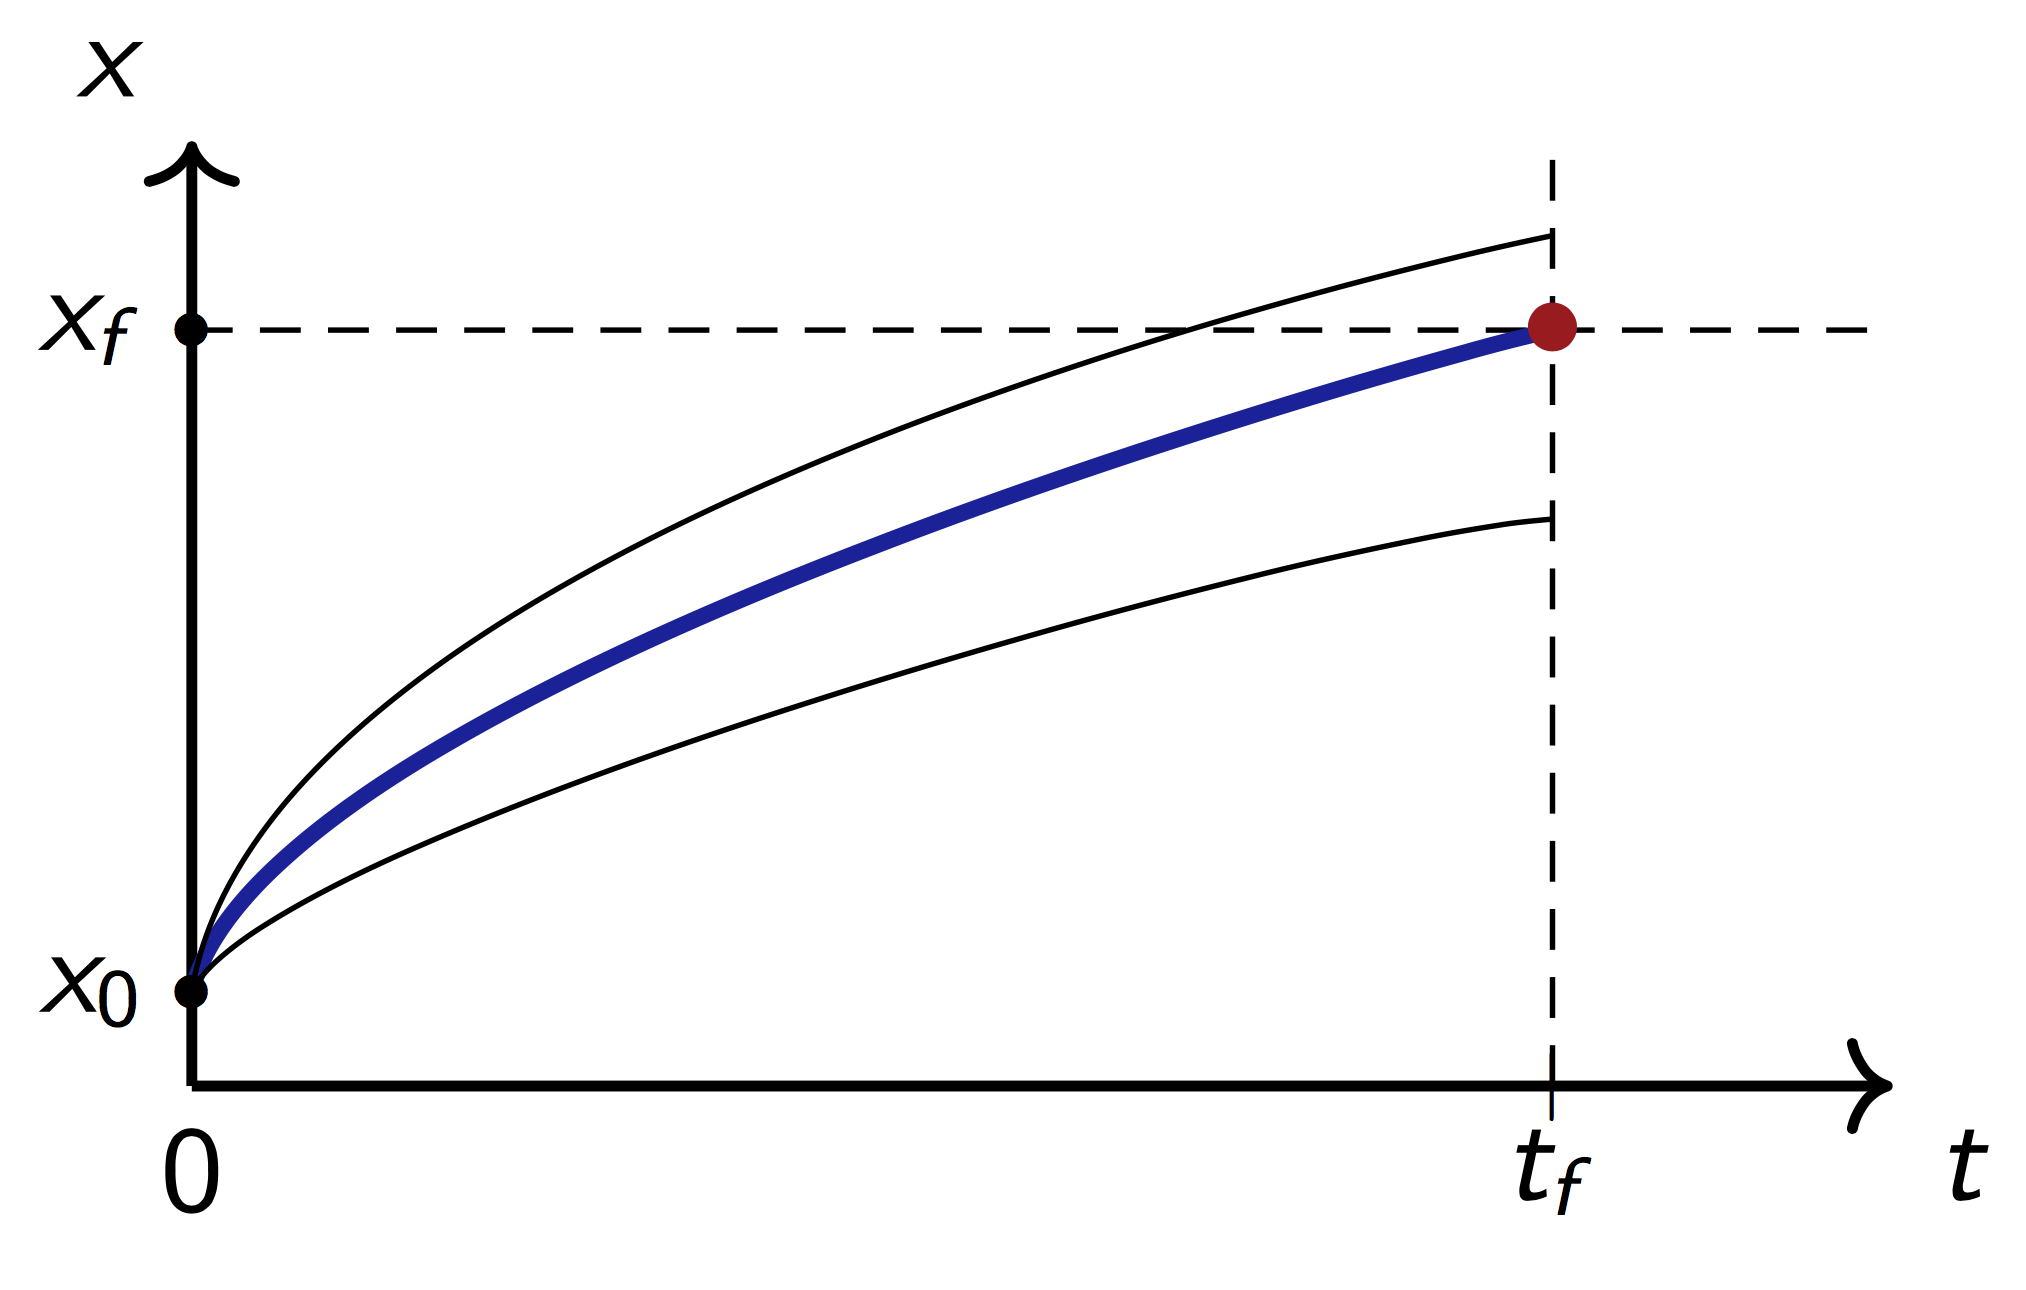
</div>
<div align="center">
<i>
Figure: Illustration of the shooting method in the state-time space. The blue trajectory reaches the target in red.
</i>
</div>


<div align="center">
    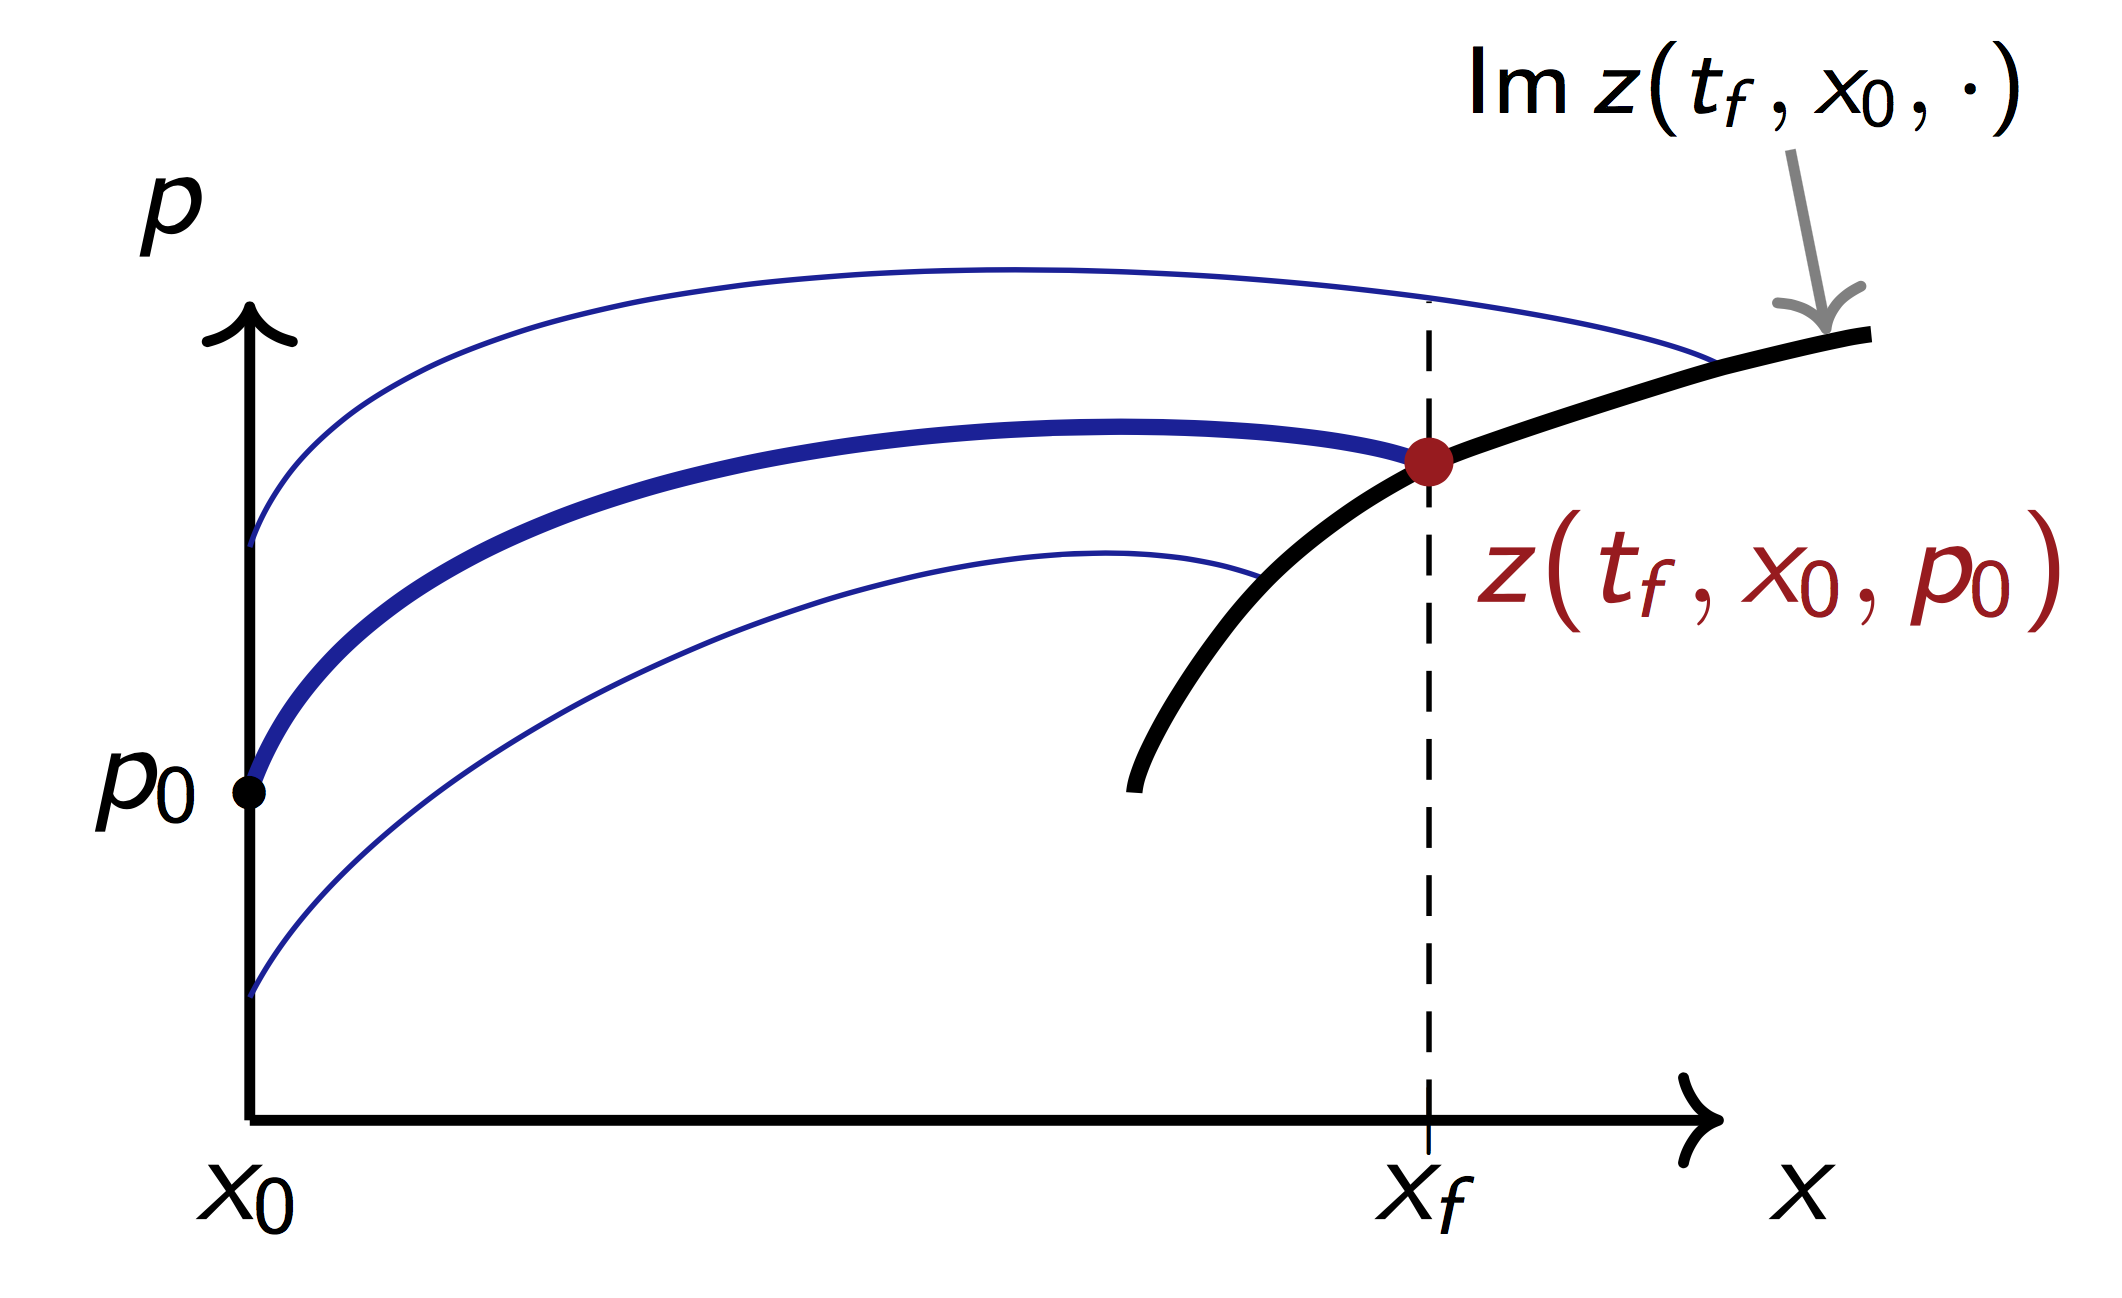
</div>
<div align="center">
<i>
Figure: Illustration of the shooting method in the cotangent space. The blue extremal reaches the target in red.
</i>
</div>


## Numerical resolution of the shooting equations

In [1]:
import nutopy as nu
import numpy as np
import matplotlib.pyplot as plt

### 1 - Using nutopy from the Hamiltonian system

In [2]:
# The Hamiltonian system

def hv(x, p):
    return np.array([-x + p, p])

In [3]:
# The exponential mapping

def expo(t, x0, p0):
    sol = nu.ivp.exp( lambda t, z: hv(z[0], z[1]), # we work with z=(x,p): f(t, z) = hv(x, p)
                      t, 
                      0.0, 
                      np.array([x0, p0]) )         # z0 = (x0, p0)
    return sol.xf[0], sol.xf[1]

In [4]:
# The shooting equation

def shoot(p0):
    tf        =  1.0
    x0        = np.array([-1.0])
    xf_target = np.array([ 0.0])
    xf, pf = expo(tf, x0, p0)
    return xf - xf_target

In [5]:
# The shooting method: resolution of the shooting equation

p0_guess = np.array([1.0])
sol      = nu.nle.solve(shoot, p0_guess);
p0_sol   = sol.x

print('NLE\t: ', '\n\n p0_sol =', p0_sol, '\n shoot  =', shoot(p0_sol), '\n')
   


     Calls  |f(x)|                 |x|
 
         1  8.073217526767197e-01  1.000000000000000e+00
         2  1.428248003892962e-08  3.130352977215060e-01
         3  6.938893903907228e-18  3.130352855682848e-01
         4  6.938893903907228e-18  3.130352855682848e-01
         5  1.428248013607414e-08  3.130352734150637e-01
         6  6.938893903907228e-18  3.130352855682848e-01

 Results of the nle solver method:

 xsol    =  [0.31303529]
 f(xsol) =  [-6.9388939e-18]
 nfev    =  6
 njev    =  2
 status  =  1
 success =  True 

 Successfully completed: relative error between two consecutive iterates is at most TolX.

NLE	:  

 p0_sol = [0.31303529] 
 shoot  = [-6.9388939e-18] 



### 2 - Using nutopy from the Hamiltonian

In [6]:
# Hamiltonian

def dhfun(t, x, dx, p, dp):
    # dh = dh_x dx + dh_p dp
    hd = -p*dx + (-x+p)*dp
    return hd
    
def d2hfun(t, x, dx, d2x, p, dp, d2p):
    # d2h = dh_xx dx d2x + dh_xp dp d2x + dh_px dx d2p + dh_pp dp d2p
    hdd = -d2p*dx + (-d2x+d2p)*dp
    return hdd

@nu.tools.tensorize(dhfun, d2hfun, tvars=(2, 3))
def hfun(t, x, p):
    h =  p * (-x + p) - 0.5*p**2
    return h

h = nu.ocp.Hamiltonian(hfun)
f = nu.ocp.Flow(h)

In [7]:
# Shooting function

def shoot(p0):
    t0        =  0.0
    tf        =  1.0
    x0        = np.array([-1.0])
    xf_target = np.array([ 0.0])
    xf, pf = f(t0, x0, p0, tf)
    s = xf - xf_target
    return s

In [8]:
# The shooting method: resolution of the shooting equation

p0_guess = np.array([1.0])
sol      = nu.nle.solve(shoot, p0_guess);
p0_sol   = sol.x

print('NLE\t: ', '\n\n p0_sol =', p0_sol, '\n shoot  =', shoot(p0_sol), '\n')
    


     Calls  |f(x)|                 |x|
 
         1  8.073217526767197e-01  1.000000000000000e+00
         2  1.428248003892962e-08  3.130352977215060e-01
         3  6.938893903907228e-18  3.130352855682848e-01
         4  6.938893903907228e-18  3.130352855682848e-01
         5  1.428248013607414e-08  3.130352734150637e-01
         6  6.938893903907228e-18  3.130352855682848e-01

 Results of the nle solver method:

 xsol    =  [0.31303529]
 f(xsol) =  [-6.9388939e-18]
 nfev    =  6
 njev    =  2
 status  =  1
 success =  True 

 Successfully completed: relative error between two consecutive iterates is at most TolX.

NLE	:  

 p0_sol = [0.31303529] 
 shoot  = [-6.9388939e-18] 



# TOUT EN SCALAIRE : a supprimer une fois ok

## cas 1

In [9]:
# The Hamiltonian system

def hv(x, p):
    return np.array([-x + p, p])

# The exponential mapping

def expo(t, x0, p0):
    sol = nu.ivp.exp( lambda t, z: hv(z[0], z[1]), # we work with z=(x,p): f(t, z) = hv(x, p)
                      t, 
                      0.0, 
                      np.array([ x0, float(p0) ]) )         # z0 = (x0, p0)
    return sol.xf[0], sol.xf[1]

# The shooting equation

def shoot(p0):
    tf        =  1.0
    x0        = -1.0
    xf_target = 0.0
    xf, pf = expo(tf, x0, p0)
    return xf - xf_target

# The shooting method: resolution of the shooting equation

p0_guess = 1.0
sol      = nu.nle.solve(shoot, p0_guess);
p0_sol   = sol.x

print('NLE\t: ', '\n\n p0_sol =', p0_sol, '\n shoot  =', shoot(p0_sol), '\n')
   


     Calls  |f(x)|                 |x|
 
         1  8.073217526767197e-01  1.000000000000000e+00
         2  1.428248003892962e-08  3.130352977215060e-01
         3  6.938893903907228e-18  3.130352855682848e-01
         4  6.938893903907228e-18  3.130352855682848e-01
         5  1.428248013607414e-08  3.130352734150637e-01
         6  6.938893903907228e-18  3.130352855682848e-01

 Results of the nle solver method:

 xsol    =  0.3130352855682848
 f(xsol) =  -6.938893903907228e-18
 nfev    =  6
 njev    =  2
 status  =  1
 success =  True 

 Successfully completed: relative error between two consecutive iterates is at most TolX.

